In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generating Random Dataset

In [3]:
X = np.vstack([(np.random.randn(10, 2)*5),(np.random.randn(10, 2)*10)])
Y = np.hstack([[0]*10,[1]*10])
dataset = pd.DataFrame(X, columns=['X1','X2'])
dataset["Y"] = Y

# Random Data set generated

In [4]:
dataset

,X1,X2,Y
0,9.555600,-2.586837,0
1,4.537471,2.506682,0
2,4.610806,-4.364381,0
3,2.226239,-6.023613,0
4,-8.713601,7.694134,0
5,-6.362009,-6.769921,0
6,-2.021310,-2.309702,0
7,-1.595813,3.454309,0
8,1.957660,-0.454362,0
9,1.575773,-2.670036,0


### Generating plot

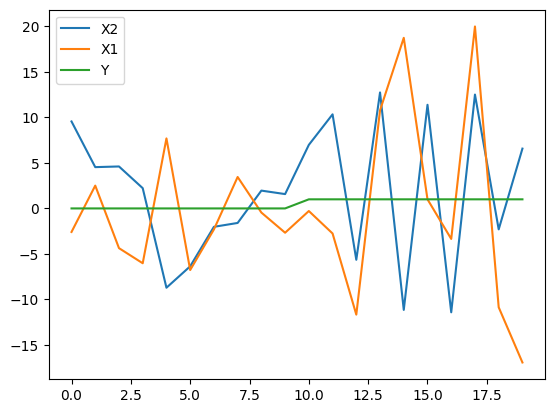

In [5]:
plt.plot(dataset, label='Inline label')
plt.legend(["X2", "X1", "Y"])

### Generating target variable to vector of number of classes 

In [6]:
Z = np.zeros((20, 2))
for i in range(20):
    Z[i, Y[i]] = 1

In [7]:
X.shape

(20, 2)

### Initiating Random Weights and Biases

In [8]:
Wi_1 = np.random.randn(3, 2)
Bi_1 = np.random.randn(3)
Wi_2 = np.random.randn(3, 2)
Bi_2 = np.random.randn(2)

In [9]:
Wi_1, Bi_1, Wi_2, Bi_2

(array([[ 1.11622595, -1.80566327],
        [ 1.10953004, -1.35844202],
        [-0.51663981,  0.33262519]]),
 array([-0.78363999,  0.1103823 , -1.09542553]),
 array([[ 0.95276413,  0.60521726],
        [-1.54010574,  1.18418477],
        [ 1.26225147,  0.01334278]]),
 array([0.71582946, 0.07031979]))

In [10]:
Wi_1.T

array([[ 1.11622595,  1.10953004, -0.51663981],
       [-1.80566327, -1.35844202,  0.33262519]])

In [11]:
X

array([[  9.55559988,  -2.58683674],
       [  4.53747074,   2.50668189],
       [  4.61080559,  -4.3643807 ],
       [  2.22623857,  -6.02361272],
       [ -8.7136008 ,   7.69413389],
       [ -6.36200885,  -6.76992131],
       [ -2.0213104 ,  -2.30970241],
       [ -1.59581333,   3.45430924],
       [  1.95766034,  -0.45436201],
       [  1.57577294,  -2.67003631],
       [  6.98403559,  -0.28573366],
       [ 10.33855514,  -2.75351495],
       [ -5.64202739, -11.66972064],
       [ 12.74395287,  10.78355461],
       [-11.15014442,  18.74520895],
       [ 11.38766988,   0.99918092],
       [-11.41424414,  -3.3513436 ],
       [ 12.51027047,  19.993042  ],
       [ -2.30135775, -10.86230912],
       [  6.57219272, -16.92777436]])

In [12]:
X.shape

(20, 2)

In [13]:
X.dot(Wi_1.T)

array([[ 15.33716465,  14.11629288,  -5.79725036],
       [  0.53861917,   1.62927811,  -1.51045248],
       [ 13.0273028 ,  11.04458546,  -3.83382868],
       [ 13.36160154,  10.6528072 ,  -3.15376879],
       [-23.61936234, -20.12003666,   7.0610558 ],
       [  5.12275891,   2.13770561,   1.03502069],
       [  1.9143057 ,   0.89489219,   0.27602422],
       [ -8.01860758,  -6.46308165,   1.97345095],
       [  3.00561607,   2.78930741,  -1.16253752],
       [  6.58010515,   5.37545693,  -1.70222836],
       [  8.31170055,   8.13714993,  -3.70327303],
       [ 16.51208437,  15.21142796,  -6.25719759],
       [ 14.7738086 ,   9.59263996,  -0.96674707],
       [ -5.24633762,  -0.50903509,  -2.9971515 ],
       [-46.29361594, -37.83569972,  11.99573715],
       [ 10.90702835,  11.27763252,  -5.55097086],
       [ -6.68947746,  -8.11184084,   4.78231162],
       [-22.13641314, -13.27886738,   0.18688561],
       [ 17.04483742,  12.20239157,  -2.42410459],
       [ 37.90191255,  30.28744

### Defining the Forward Propogation function

In [14]:
def forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2):
    # First layer
    M = 1/(1+np.exp(-(X.dot(Wi_1.T) + Bi_1)))
    # Second layer
    A = M.dot(Wi_2) + Bi_2
    # Softmax
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True)
    return Y, M

In [15]:
forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)

(array([[0.15059196, 0.84940804],
        [0.1925656 , 0.8074344 ],
        [0.15158421, 0.84841579],
        [0.15269744, 0.84730256],
        [0.86889486, 0.13110514],
        [0.2952749 , 0.7047251 ],
        [0.33088917, 0.66911083],
        [0.82099004, 0.17900996],
        [0.18170014, 0.81829986],
        [0.16120495, 0.83879505],
        [0.15180677, 0.84819323],
        [0.15053214, 0.84946786],
        [0.16936199, 0.83063801],
        [0.39476645, 0.60523355],
        [0.86925587, 0.13074413],
        [0.15063911, 0.84936089],
        [0.86566752, 0.13433248],
        [0.73190598, 0.26809402],
        [0.15507996, 0.84492004],
        [0.15043623, 0.84956377]]),
 array([[9.99999522e-01, 9.99999337e-01, 1.01416408e-03],
        [4.39049422e-01, 8.50643927e-01, 6.87610780e-02],
        [9.99995184e-01, 9.99985696e-01, 7.17996999e-03],
        [9.99996553e-01, 9.99978836e-01, 1.40748029e-02],
        [2.52296222e-11, 2.04135025e-09, 9.97441137e-01],
        [9.87120039e-01, 9.0

## Back Propogation by Differentiating or Gradient Descent

In [16]:
# returns gradient for weights_2
def diff_Wi_2(H, Z, Y):
    return H.T.dot(Z-Y)

In [17]:
# returns gradient for weights_1
def diff_Wi_1(X, H, Z, output, Wi_2):
    dZ = (Z-output).dot(Wi_2.T) * H * (1-H)
    return X.T.dot(dZ)

In [18]:
# returns derivative for both biases
def diff_Bi2(Z, Y):
    return (Z-Y).sum(axis=0)

def diff_Bi1(Z, Y, Wi_2, H):
    return ((Z-Y).dot(Wi_2.T) * H * (1-H)).sum(axis=0)

In [19]:
learning_rate = 1e-3
for epoch in range(200000):
    output, hidden = forward_prop(X, Wi_1, Bi_1, Wi_2, Bi_2)
    Wi_2 += learning_rate * diff_Wi_2(hidden, Z, output)
    Bi_2 += learning_rate * diff_Bi2(Z, output)
    Wi_1 += learning_rate * diff_Wi_1(X, hidden, Z, output, Wi_2).T
    Bi_1 += learning_rate * diff_Bi1(Z, output, Wi_2, hidden)

### Generating predectition at new datapoint

In [20]:
X_test = np.array([4,1])

hidden_output = 1/(1+np.exp(-(X_test.dot(Wi_1.T) + Bi_1)))
Outer_layer_output = hidden_output.dot(Wi_2) + Bi_2
expA = np.exp(Outer_layer_output)
Y = expA/expA.sum()
print(" porb of class 0 >>>>>>>>>>>>> {} \n prob of class 1 >>>>>>>>>>>>> {} ".format(Y[0], Y[1]))

 porb of class 0 >>>>>>>>>>>>> 0.9748966660257836 
 prob of class 1 >>>>>>>>>>>>> 0.02510333397421635 
